## Stores Sales Prediction

### Model to predict the Sales of a store.

In [1]:
# Importing required Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean,std
from sklearn import preprocessing,metrics
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore')

In [2]:
# Importing Data
store=pd.read_csv("C:/Users/acer/Downloads/DS3_C6_S1_Regression_StoreSales_Data_Project.csv")
store.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#Checking Datatypes
store.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [4]:
store.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
#Checking missing values.
store.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

Total 5681 missing values in the target variable i.e. Item Outlet Sales 

In [6]:
#Cheking missing value range
store.tail(5681)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
8524,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
8525,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,NaN
8526,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
8527,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.300,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


In [7]:
#Checking structure of data
store.shape

(14204, 12)

### EDA

#### Univariate

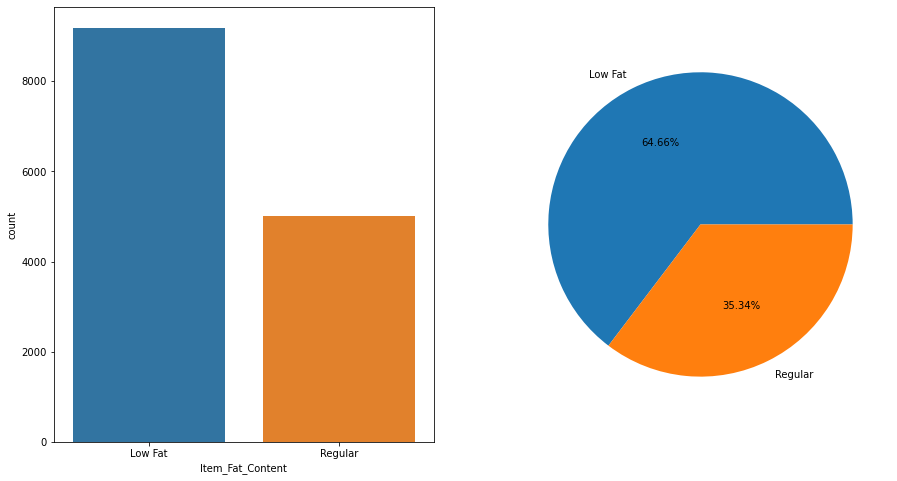

In [11]:
#Item_Fat_Content
fig,ax=plt.subplots(1,2,figsize=(15,8))
sns.countplot(x=store['Item_Fat_Content'],ax=ax[0])
plt.pie(store['Item_Fat_Content'].value_counts(),labels=store['Item_Fat_Content'].value_counts().index,
        autopct='%.2f%%');

Low Fat Content Item are more in numbers.

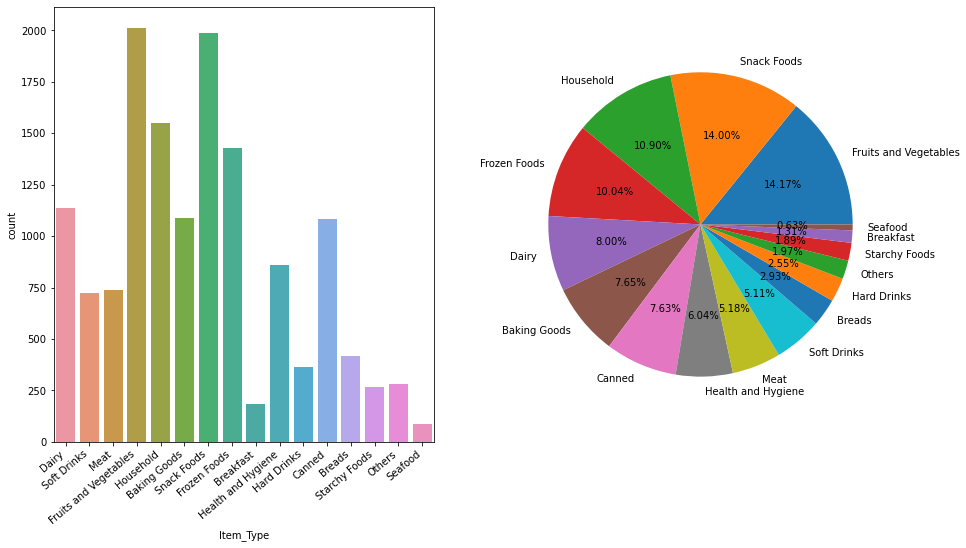

In [12]:
#Item_Type
fig,ax=plt.subplots(1,2,figsize=(15,8))
a=sns.countplot(x=store['Item_Type'],ax=ax[0])
a.set_xticklabels(a.get_xticklabels(),rotation=40,ha='right')
plt.pie(store['Item_Type'].value_counts(),labels=store['Item_Type'].value_counts().index,
        autopct='%.2f%%');

Fruits and vegetables are having higher ratio followed by Snack Foods.

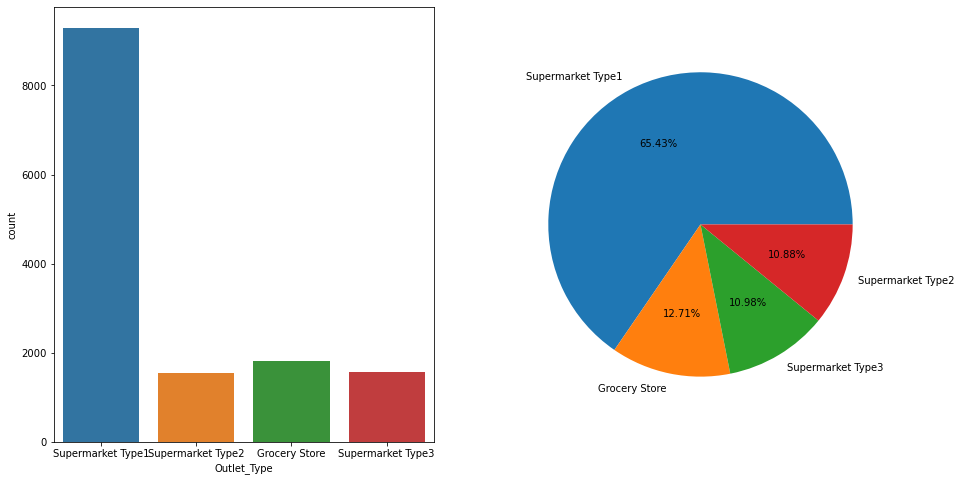

In [13]:
#Outlet_Type
fig,ax=plt.subplots(1,2,figsize=(15,8))
sns.countplot(x=store['Outlet_Type'],ax=ax[0])
plt.pie(store['Outlet_Type'].value_counts(),labels=store['Outlet_Type'].value_counts().index,
        autopct='%.2f%%');

Supermarket Type 1 has the highest share in Outlet type.

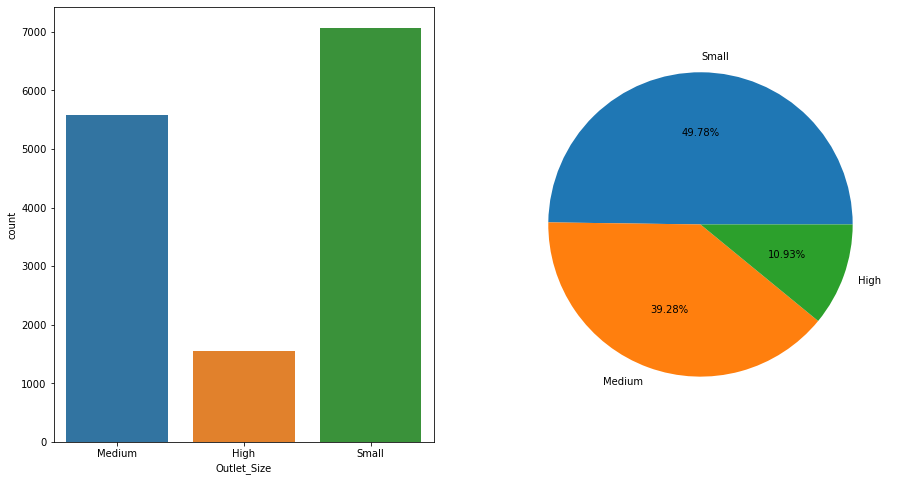

In [14]:
#Outlet_Size
fig,ax=plt.subplots(1,2,figsize=(15,8))
sns.countplot(x=store['Outlet_Size'],ax=ax[0])
plt.pie(store['Outlet_Size'].value_counts(),labels=store['Outlet_Size'].value_counts().index,
        autopct='%.2f%%');

Small Outlets are more in number folowed by Meduim than High Outlet sizes.

### Bi-variate Analysis

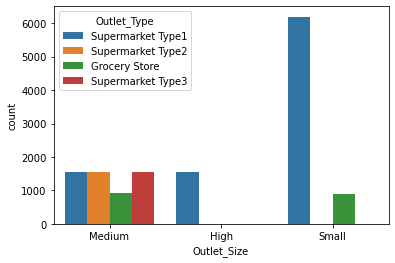

In [15]:
#Outlet_Size and Outlet_Type
sns.countplot(x=store['Outlet_Size'],hue=store['Outlet_Type']);

Supermarket type1  and small outlet size has the highest number.

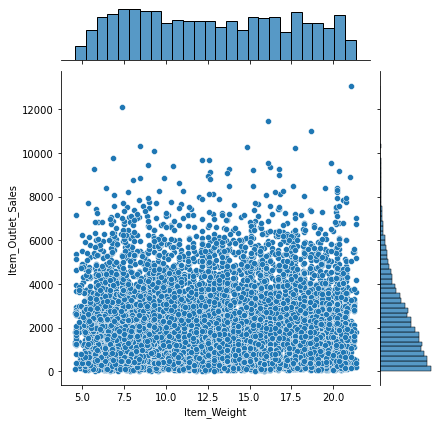

In [12]:
#Item_Weight V/s Item_Outlet_Sales
sns.jointplot(x=store['Item_Weight'],y=store['Item_Outlet_Sales']);

Item weight Whose weight is between 6-10 sales is more.

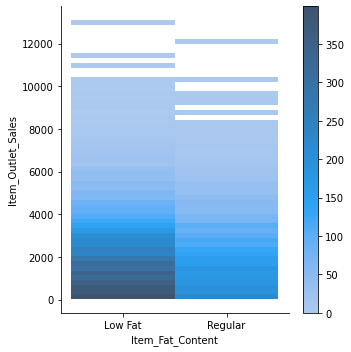

In [19]:
#Item_Weight V/s Item_Outlet_Sales
sns.displot(x=store['Item_Fat_Content'],y=store['Item_Outlet_Sales'],cbar=True);

Sales of low fat is more nad density of sales upto 2500 is more.

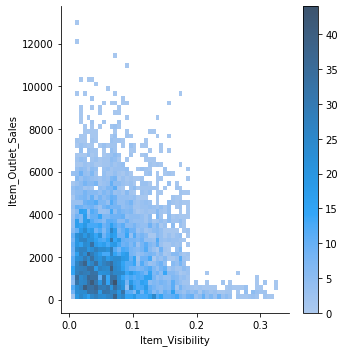

In [20]:
#Item_Visibility V/s Item_Outlet_Sales
sns.displot(x=store['Item_Visibility'],y=store['Item_Outlet_Sales'],cbar=True);

Item_Visibility of product b/w 0-0.1 is more and its outlet sales is also more as its density is more in graph

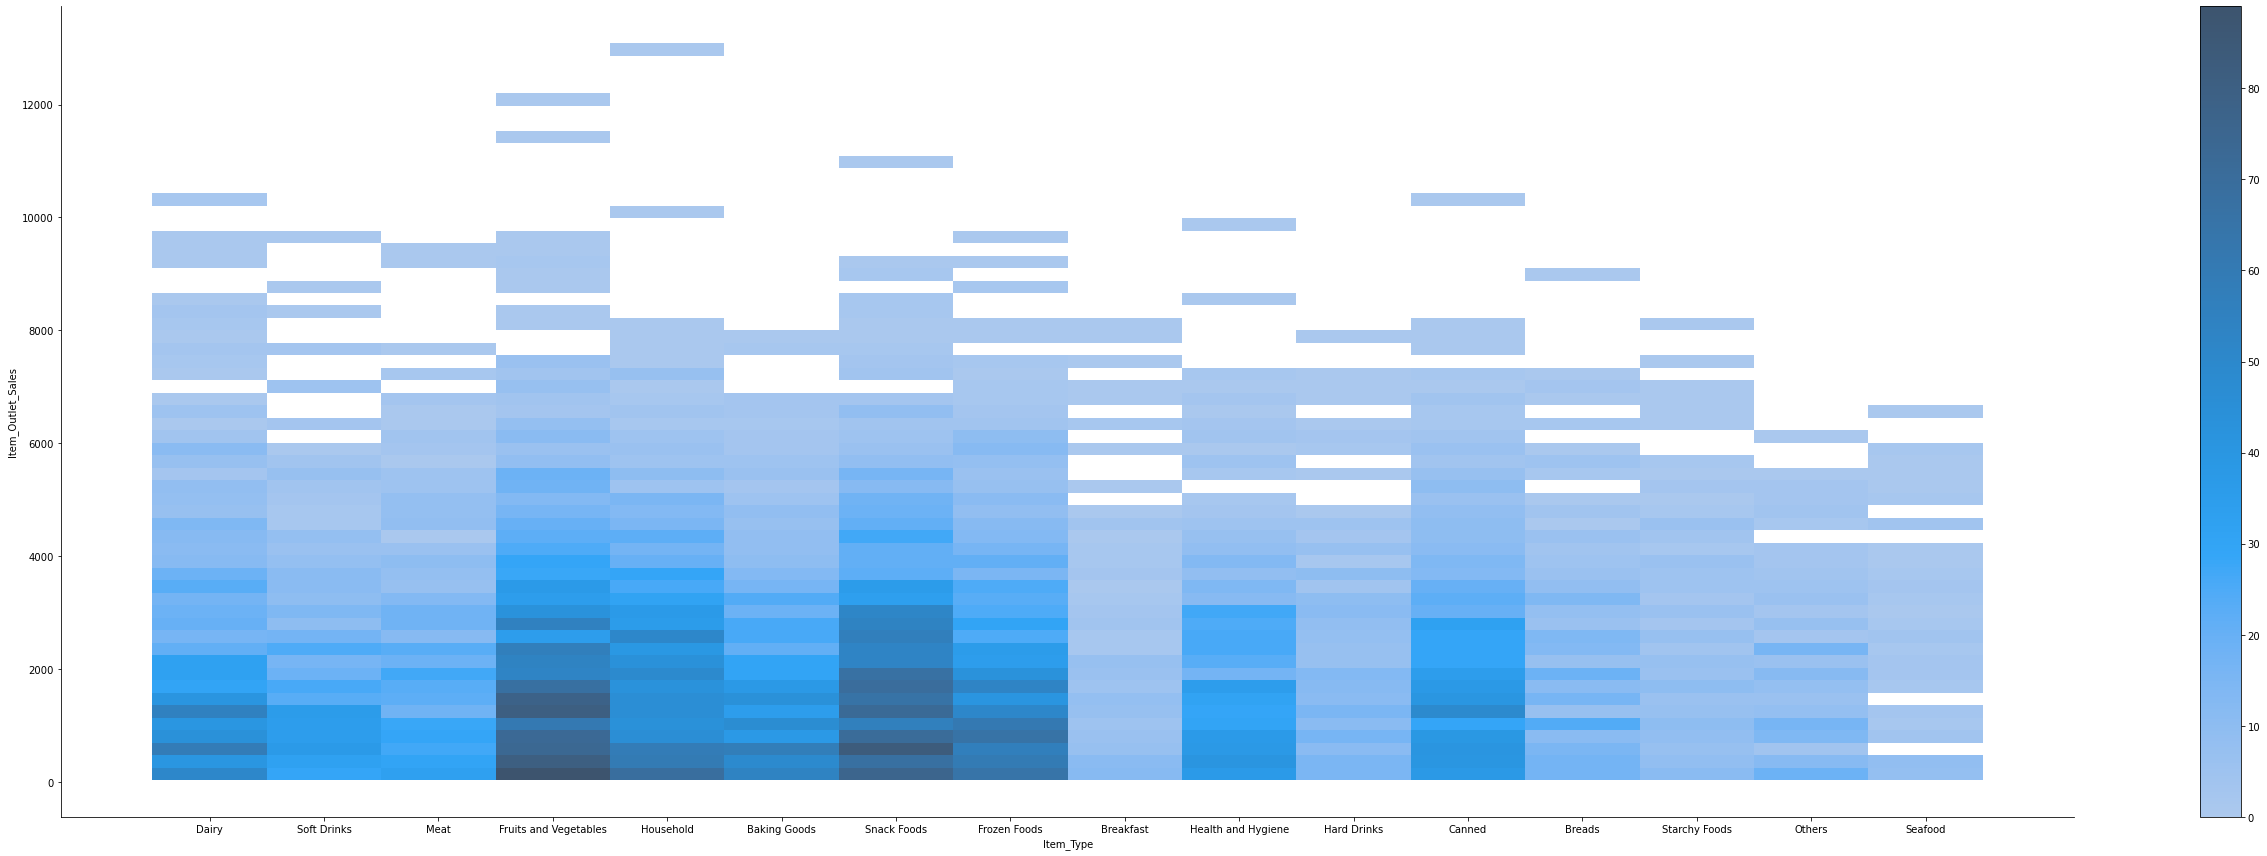

In [41]:
#Item_TypeV/s Item_Outlet_Sales
sns.displot(data=store,x=store['Item_Type'],y=store['Item_Outlet_Sales'],height=12,aspect=3,cbar=True);


Fruits and Vegetables followed by Snacks foods have more outlet sales as their density is more in above graph.

In [9]:
store.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


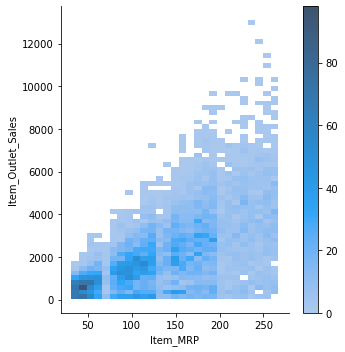

In [47]:
#Item_MRP V/s Item_Outlet_Sales
sns.displot(data=store,x=store['Item_MRP'],y=store['Item_Outlet_Sales'],cbar=True);

Item Mrp upto 50 outlet sales is more and is upto 2000 as shown above.

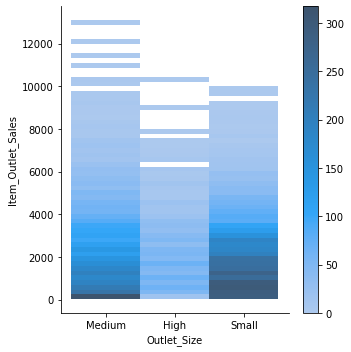

In [51]:
#Outlet_Size V/s Item_Outlet_Sales
sns.displot(data=store,x=store['Outlet_Size'],y=store['Item_Outlet_Sales'],cbar=True);

Small outlets sales density is more for sales upto 4000 but Medium outlet sales is distributed over large sales value.

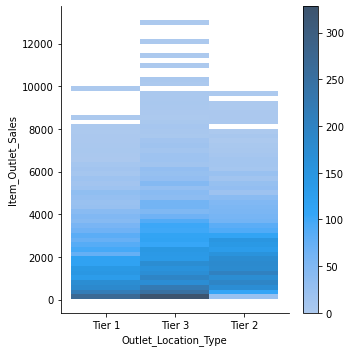

In [52]:
#Outlet_Location_Type V/s Item_Outlet_Sales
sns.displot(data=store,x=store['Outlet_Location_Type'],y=store['Item_Outlet_Sales'],cbar=True);

Tier 3 location has large outlet sales followed by Tier 1 as seen from density of it.

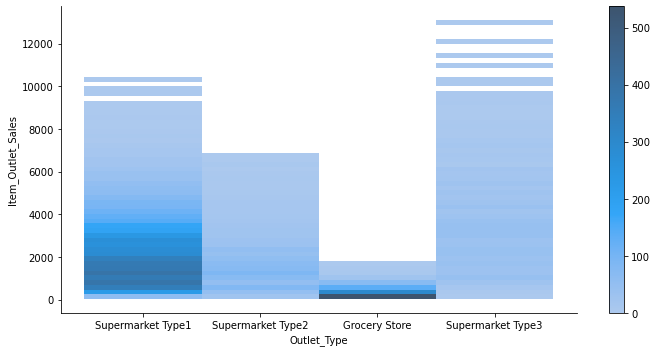

In [54]:
#Outlet_Type V/s Item_Outlet_Sales
sns.displot(data=store,x=store['Outlet_Type'],y=store['Item_Outlet_Sales'],cbar=True,aspect=2);

Supermarket type 1 has has large sales outlet upto 4000 and Supermarket type 3 Sales is distributed upto 10000.

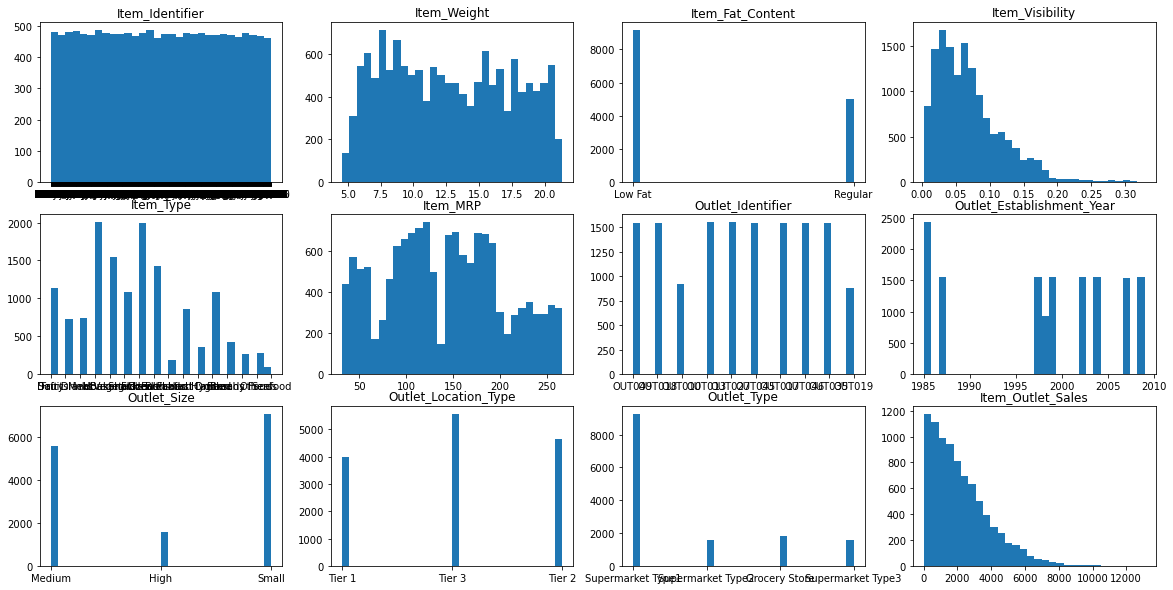

In [16]:
fig,ax=plt.subplots(3,4,figsize=(20,10))
cols=store.columns
a=0
for i in range(3):
    for j in range(4):
        ax[i][j].hist(store[cols[a]],bins=30)
        ax[i][j].title.set_text(cols[a])
        a+=1

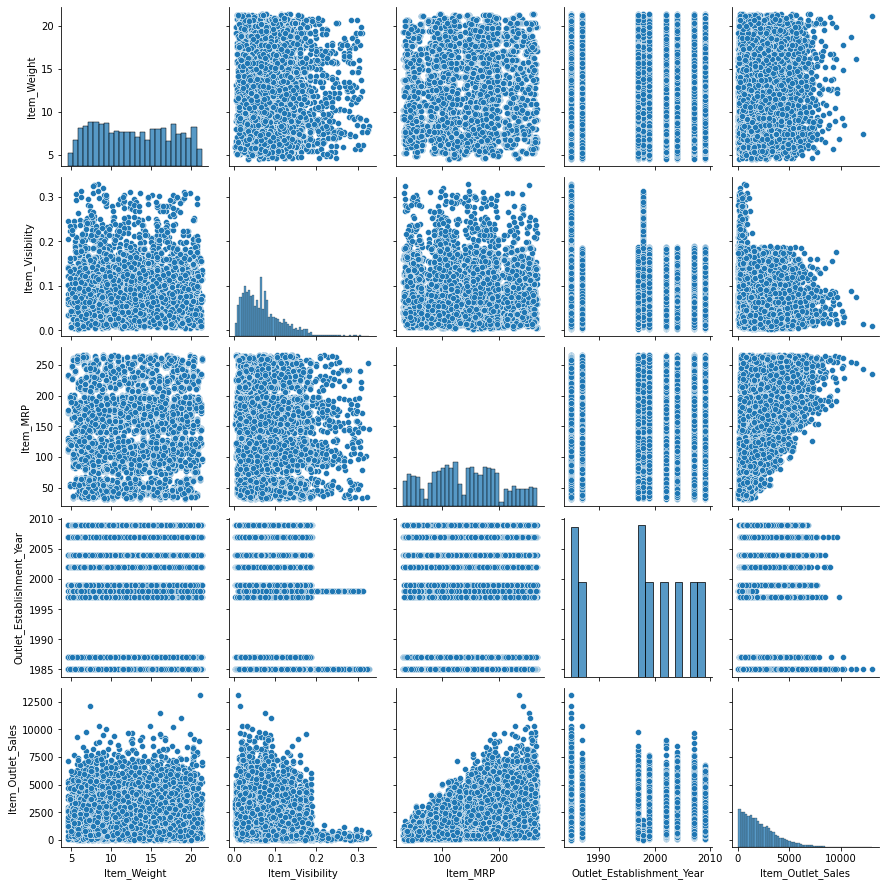

In [17]:
sns.pairplot(store,diag_kind='hist');

In [57]:
store.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### We are dropping Item_Identifier(as they are unique values for each), Outlet_Identifier(as they are unique values for each),Outlet_Establishment_Year(its not of use for predicting sales)

In [58]:
stored=store.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.064299,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


In [59]:
le=preprocessing.LabelEncoder()
#label encoding for catergorical data type
stored['Item_Fat_Content']=le.fit_transform(stored['Item_Fat_Content'])
stored['Item_Type']=le.fit_transform(stored['Item_Type'])
stored['Outlet_Size']=le.fit_transform(stored['Outlet_Size'])
stored['Outlet_Location_Type']=le.fit_transform(stored['Outlet_Location_Type'])
stored['Outlet_Type']=le.fit_transform(stored['Outlet_Type'])
stored

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1,0,1,2097.2700
3,19.20,1,0.074402,6,182.0950,1,2,0,732.3800
4,8.93,0,0.064299,9,53.8614,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...
14199,10.50,1,0.013496,13,141.3154,2,0,1,NaN
14200,7.60,1,0.142991,15,169.1448,1,2,2,NaN
14201,10.00,0,0.073529,8,118.7440,2,1,1,NaN
14202,15.30,1,0.064709,3,214.6218,2,1,1,NaN


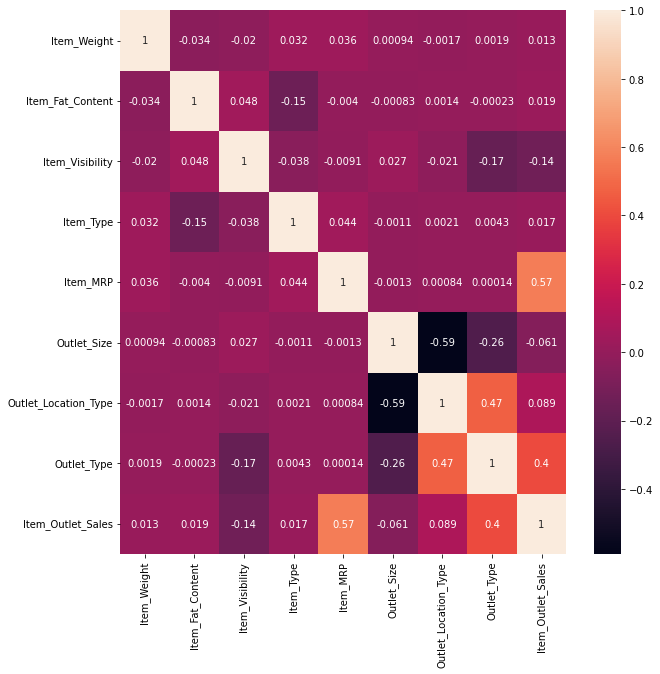

In [60]:
plt.figure(figsize=(10,10))
sns.heatmap(stored.corr(),annot=True);

As target variable is continous so in our regression model we have included only numeric and one label data i.e. Outlet_Type.

Here are target variable is Item Outlet Sales Column

Highly correlated features with Item sales column required rest if we want we can drop it but here i am considering all numeric column for analysis

In [63]:
X=stored.iloc[:,:8]
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1,0,1,2097.2700
3,19.20,1,0.074402,6,182.0950,1,2,0,732.3800
4,8.93,0,0.064299,9,53.8614,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...
14199,10.50,1,0.013496,13,141.3154,2,0,1,NaN
14200,7.60,1,0.142991,15,169.1448,1,2,2,NaN
14201,10.00,0,0.073529,8,118.7440,2,1,1,NaN
14202,15.30,1,0.064709,3,214.6218,2,1,1,NaN


In [66]:
X=stored.iloc[:,:8] #
y=stored.iloc[:,-1] #
y.tail(5681)

8523    NaN
8524    NaN
8525    NaN
8526    NaN
8527    NaN
         ..
14199   NaN
14200   NaN
14201   NaN
14202   NaN
14203   NaN
Name: Item_Outlet_Sales, Length: 5681, dtype: float64

Here we have separated the feature columns and target column.


In [67]:
X_t=X.head(8523)
X_val =X.tail(5681)
y_t=y.head(8523)
y_val =y.tail(5681)
X_t.shape,X_val.shape,y_t.shape,y_val.shape

((8523, 8), (5681, 8), (8523,), (5681,))

As we have 5681 null values in target column so we can take that values as validation set.And can apply train-test split on remaining data.

In [68]:
scaler=preprocessing.StandardScaler()
X_train,X_test,y_train,y_test=train_test_split(X_t,y_t,test_size=0.25,random_state=22)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

From here i have applied various regression model.

### Linear Regression

In [69]:
names=[]
results=[]

In [72]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import RepeatedKFold,cross_val_score

In [71]:
limodel=LinearRegression()
cv=RepeatedKFold(n_splits=10,n_repeats=6,random_state=22)
n_score=cross_val_score(limodel,X_train,y_train,cv=cv,scoring='r2',n_jobs=-1,error_score='raise')
names.append("Lin")
results.append(n_score)
print('Score: %.3f (%.3f)' % (mean(n_score), std(n_score)))

Score: 0.500 (0.026)


In [74]:
limodel.fit(X_train,y_train)
y_pred_li=limodel.predict(X_test)
limodel.score(X_test,y_test)

0.49156144052289463

In [78]:
MSE=mean_squared_error(y_pred_li,y_test)
RMSE=np.sqrt(MSE)
print('\nMSE: ',MSE,'\nRMSE: ',RMSE)


MSE:  1540586.3525512472 
RMSE:  1241.2035902909913


### GridSearch

In [80]:
from sklearn.model_selection import GridSearchCV
param_grid={'alpha':[0.00001,0.001,0.01,0.1,1,5,10,100]}

In [81]:
model=Ridge()
grid_model=GridSearchCV(estimator=model,
                       param_grid=param_grid,
                       scoring='r2',
                       cv=6)

In [82]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.001, 0.01, 0.1, 1, 5, 10, 100]},
             scoring='r2')

In [83]:
cv=RepeatedKFold(n_splits=10,n_repeats=6,random_state=22)
n_score=cross_val_score(grid_model,X_train,y_train,cv=cv,scoring='r2',n_jobs=-1,error_score='raise')
names.append("Ridge")
results.append(n_score)

In [84]:
grid_model.best_estimator_

Ridge(alpha=10)

In [85]:
grid_model.score(X_train,y_train)

0.5031104373488725

In [86]:
y_pred_r=grid_model.predict(X_test)
grid_model.score(X_test,y_test)

0.4916052988156322

In [87]:
MSE=mean_squared_error(y_pred_r,y_test)
RMSE=np.sqrt(MSE)
print('\nMSE: ',MSE,'\nRMSE: ',RMSE)


MSE:  1540453.4604131938 
RMSE:  1241.1500555586315


### Bagging

In [89]:
from sklearn.ensemble import RandomForestRegressor
Rmodel=RandomForestRegressor()
cv=RepeatedKFold(n_splits=10,n_repeats=6,random_state=22)
n_score=cross_val_score(Rmodel,X_train,y_train,scoring='r2',cv=cv,n_jobs=-1,error_score='raise')
names.append("Baging")
results.append(n_score)
print('Score :%.3f (%.3f)' %(mean(n_score),std(n_score)))

Score :0.544 (0.033)


In [98]:
Rmodel.fit(X_train,y_train)
y_pred_b=Rmodel.predict(X_test)
Rmodel.score(X_test,y_test)

0.5293112936634066

In [99]:
MSE=mean_squared_error(y_pred_b,y_test)
RMSE=np.sqrt(MSE)
print('\nMSE: ',MSE,'\nRMSE: ',RMSE)


MSE:  1426202.9969322379 
RMSE:  1194.2374122980061


### Boosting

In [94]:
from sklearn.ensemble import AdaBoostRegressor
Amodel=AdaBoostRegressor()
cv=RepeatedKFold(n_splits=10,n_repeats=6,random_state=22)
n_score=cross_val_score(Amodel,X_train,y_train,scoring='r2',cv=cv,n_jobs=-1,error_score='raise')
names.append("Boosting")
results.append(n_score)
print('Score: %.3f (%.3f)' % (mean(n_score),std(n_score)))

Score: 0.527 (0.040)


In [100]:
Amodel.fit(X_train,y_train)
y_pred_a=Amodel.predict(X_test)
Rmodel.score(X_test,y_test)

0.5293112936634066

In [101]:
MSE=mean_squared_error(y_pred_a,y_test)
RMSE=np.sqrt(MSE)
print('\nMSE: ',MSE,'\nRMSE: ',RMSE)


MSE:  1477736.486365325 
RMSE:  1215.6218517143088


### Stacking

In [104]:
from sklearn.tree import DecisionTreeRegressor

In [105]:
from sklearn.ensemble import StackingRegressor
def get_stacking():
    stack = []
    stack.append(('DTR', DecisionTreeRegressor()))
    stack.append(('Rfr', RandomForestRegressor()))
    stack.append(('Lin', LinearRegression()))
    meta_model = LinearRegression()
    model = StackingRegressor(estimators=stack, final_estimator=meta_model, cv=3)
    return model

In [106]:
model = get_stacking()

cv = RepeatedKFold(n_splits=10, n_repeats=6, random_state=22)
n_scores = cross_val_score(model,X_train,y_train, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
names.append("Stacking")
results.append(n_scores)
print('Score: %.3f (%.3f)' % (mean(n_scores),std(n_scores)))

Score: 0.568 (0.028)


In [108]:
model.fit(X_train,y_train)
y_pred_s=model.predict(X_test)
model.score(X_test,y_test)

0.5497736319921538

In [109]:
MSE=mean_squared_error(y_pred_s,y_test)
RMSE=np.sqrt(MSE)
print('\nMSE: ',MSE,'\nRMSE: ',RMSE)


MSE:  1364201.4068030892 
RMSE:  1167.990328214703


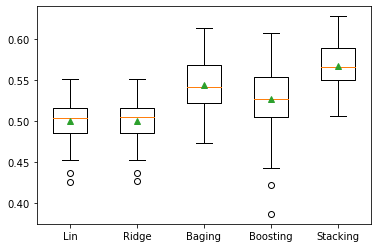

In [110]:
plt.boxplot(results,labels=names,showmeans=True);

From above analysis we can shortlist Stacking model as its score value is highest,also MSE and RMSE values are lower for it. .

### Final Evaluation on our testing dataset using Random Forest Regressor(Bagging).

In [111]:
model.fit(X_train,y_train)

StackingRegressor(cv=3,
                  estimators=[('DTR', DecisionTreeRegressor()),
                              ('Rfr', RandomForestRegressor()),
                              ('Lin', LinearRegression())],
                  final_estimator=LinearRegression())

In [112]:
print("\nScore of training dataset:",model.score(X_test,y_test))


Score of training dataset: 0.5507122860331117


In [113]:
y_pred_val=model.predict(X_val)
y_pred_val

array([37790.7012165 , 31389.75103098, 79584.45924963, ...,
       41191.95975365, 71653.5745249 , 29070.46664013])

From the model we have predicted the values of null values which were present in Item outlet sales columns.

In [114]:
store_c=store.copy()

In [115]:
s=pd.Series(y_pred_val,index=y_val.index)
s

8523     37790.701217
8524     31389.751031
8525     79584.459250
8526     52591.410605
8527     79528.965577
             ...     
14199    48449.512715
14200    58786.656202
14201    41191.959754
14202    71653.574525
14203    29070.466640
Length: 5681, dtype: float64

Filled the null values in the dataframe with predicted ones.

In [116]:
store_c['Item_Outlet_Sales'].fillna(s,inplace=True)
store_c

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.380000
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,48449.512715
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,58786.656202
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,41191.959754
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,71653.574525
